In [1]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
def draw_rm_and_price():
    plt.scatter(X[:,5], y)

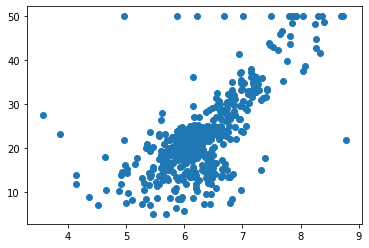

In [5]:
draw_rm_and_price()

In [6]:
def price(rm, k, b):
    return k * rm + b

In [7]:
X_rm = X[:,5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)

In [8]:
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

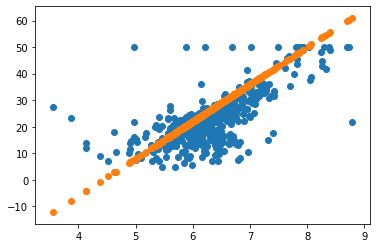

In [11]:
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [12]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

# definition loss

In [40]:
def loss_abs(y, y_hat): # to evaluate the performance 

    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [41]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [42]:
def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i,y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2 / n * gradient

When time is : 0, get best_k: -41.33890672989542 best_b: -55.39594096897478, and the loss is: 337.7286620633142
When time is : 50, get best_k: -23.662264602613888 best_b: -52.615544792262874, and the loss is: 223.85703292057744
When time is : 100, get best_k: -11.9483673033918 best_b: -50.77252251673553, and the loss is: 148.39644886845187
When time is : 150, get best_k: -4.18586837514774 best_b: -49.55068028241997, and the loss is: 98.3901389379124
When time is : 200, get best_k: 0.9581134913807964 best_b: -48.74048239018667, and the loss is: 65.25189571937995
When time is : 250, get best_k: 4.366853566014062 best_b: -48.20307348966831, and the loss is: 43.29180172827728
When time is : 300, get best_k: 6.6256816878411735 best_b: -47.84643676269869, and the loss is: 28.739256111755747
When time is : 350, get best_k: 8.12248488623348 best_b: -47.609594401772554, and the loss is: 19.10269053903364
When time is : 400, get best_k: 9.1143085696199 best_b: -47.452137565522776, and the loss i

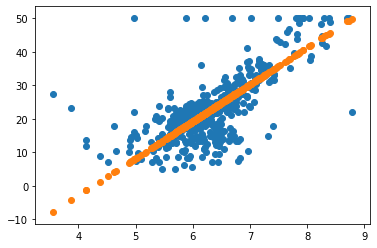

In [44]:
trying_times = 2000
X, y = data['data'], data['target']


min_loss = float('inf') 


current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100


learning_rate = 1e-04
#learning_rate = 0.002

update_time = 0


for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss_abs(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate
X_rm = X[:, 5]
k =  current_k
b = current_b
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)